<a href="https://colab.research.google.com/github/AKHIL-882/Data-Science-Internship/blob/main/DataScience_Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Prediction using Unsupervised Machine Learning

**Aim - To implement KMeans Clustering on Iris Dataset**

**Description :** This model will help them categorize the iris data info different clusters.

The datasets contains record of 150 iris data with four columns - Sepal Lenght, Sepal Width, Petal Lenght, Petal Width

**Working Model**: In this model we will see how the Python Scikit-Learn library -KMeans Clustering of machine learning can be used to implement clustering functions.

### **Importing the Required Libraries¶**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt        #visualisation
import seaborn as sns                  #Visualisation
%matplotlib inline

For more info on how to load dataset into colab.([Check this 3 ways to load data into colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92?gi=3da498ee332b#:~:text=Click%20on%20%E2%80%9CChoose%20Files%E2%80%9D%20then,name%20of%20the%20uploaded%20file).)

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [3]:

import io
dataset = pd.read_csv(io.BytesIO(uploaded['Iris.csv']))

**Printing the first 5 rows of the dataset**

In [4]:
dataset.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Printing the last 5 rows of the dataset**

In [5]:
dataset.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### **1. Exploratory Data Analysis - Checking the types of data and basic summary stats.**

There are four features - Sepal Lenght, Sepel Width, Petal Lenght and Petal Width The main aim is to construct a model that can cluster the same caterogies.Features are detailed below.

**SepalLenghtCm** :Length of the Sepal in centimeters.

**SepalWidthCm** : Width of the Sepal in centimeters.

**PetalLenghtCm**: Length of the Petal in centimeters.

**PetalWidthCm** : Length of the petal in centimeters.

**1.1 Displaying datatype of each column and also display the non-null row**

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


**1.2 Display the Summary stats which include count, mean, std, min, max etc**

In [7]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


**1.3 Finding the correlation between SepalLength and SepalWidth**

In [11]:
SepalLength = dataset['SepalLengthCm']
SepalWidth = dataset['SepalWidthCm']
correlation = SepalLength.corr(SepalWidth)
correlation

-0.10936924995064937

**Observation**: We can find that there is a **negative correlation** between **SepalLength** and **SepalWidth**, which defines as **if the SepalLength increases SepalWidth decreases and viceversa.**

In [14]:
PetalLength = dataset['PetalLengthCm']
PetalWidth = dataset['PetalWidthCm']
correlation = PetalLength.corr(PetalWidth)
correlation

0.9627570970509663

**1.4 Finding Correlation by Pearson methon**

In [16]:
corr = dataset.corr(method = 'pearson')
corr

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


### **2. Visualization**

**2.1 Visualizing Dataset using Pairplot**

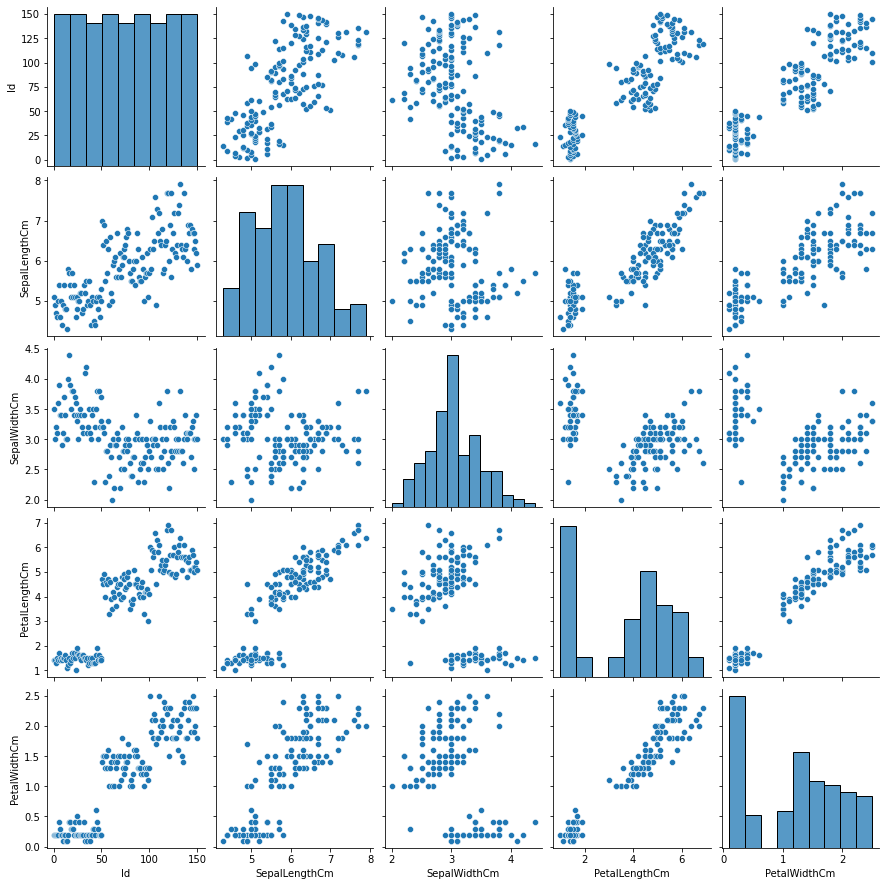

In [17]:
sns.pairplot(dataset)

**2.2 Visualizing SepalWidth vs SepalLength**

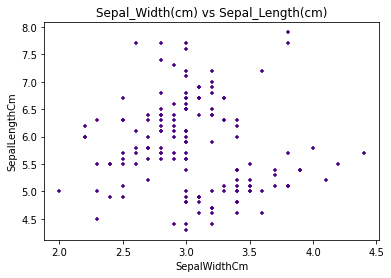

In [23]:
dataset.plot(kind = 'scatter',
               marker = '+',
               x='SepalWidthCm'
               ,y='SepalLengthCm',
               title = 'Sepal_Width(cm) vs Sepal_Length(cm)',
               c="indigo")

**2.3 Visualizing PetalWidth vs PetalLength**

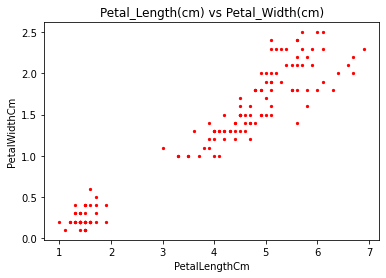

In [25]:

dataset.plot(kind = 'scatter',
               marker = '.',
               c= 'red' ,
               x='PetalLengthCm',
               y='PetalWidthCm',
               title = 'Petal_Length(cm) vs Petal_Width(cm)'
               )

**2.4 Finding Correlation using Heatmap**

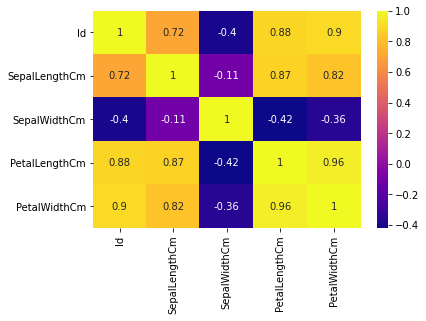

In [26]:
sns.heatmap(dataset.corr(),annot=True,cmap='plasma')

**2.5 Finding Optimum number of clusters using Elbow Curve**

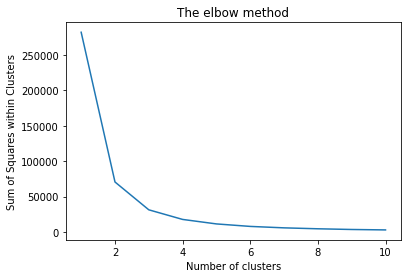

In [28]:

x = dataset.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
sum_of_squares = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sum_of_squares.append(kmeans.inertia_)
    

plt.plot(range(1, 11), sum_of_squares)
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squares within Clusters') 
plt.show()

### **3. Building the Machine Learning Model - KMeans**

**K-means** clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

**Algorithm of K-Means**

> Specify number of clusters K.

> Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.

> Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

> Compute the sum of the squared distance between data points and all centroids.

> Assign each data point to the closest cluster (centroid).

> Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster.

**3.1 Training the model**

In [30]:
kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(x)

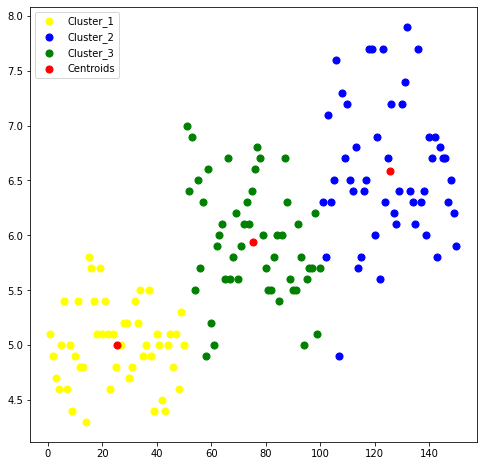

In [34]:
plt.figure(figsize=(8,8))
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 50, c = 'yellow', label = 'Cluster_1')
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 50, c = 'blue', label = 'Cluster_2')
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 50, c = 'green', label = 'Cluster_3')

#Plotting centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 50, c = 'red', label = 'Centroids')

plt.legend()

**Conclusion:**  We can conclude that the model clustered the dataset into 3 different clusters with the centroids which marked as red.